
# House Prices Prediction

Predicting house prices is not a simple task, considering the infinite characteristics that could be taken into account, the construction material, the number of rooms, the number of bathrooms, the area, the year of construction, etc. In machine learning, models that make predictions are applied. First it is necessary to carry out an exhaustive study of the available information, a selection of variables, identify if there is multicollinearity, if it is necessary to normalize some variables and other things. After performing the exploratory analysis of the data, you can proceed to adjust the model and then evaluate the performance.

To apply these models it is necessary to have a set of data in which the problem can be explained. A priori we do't know what are the most appropriate characteristics for the model, therefore, it is necessary to perform an exploratory analysis.

To predict houses prices, it's decided to apply a multiple linear regression model to predict the exact value and a decision tree to find the expected price range according to the selection of the desired property conditions.

## 1. Data exploration

The first step is the data import, then a first scan of the available variables is carried out. The type of data available, if any conversion is necessary and the amount of missing values there is.

In [1465]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

In [1466]:
# Load the data and know the size
house_price=pd.read_csv('train.csv')
house_price=house_price.drop(columns="Id")
house_price.shape

(1460, 80)

Once the dataset is imported, the response variable **SalePrice** is separated from the rest of the database and a first exploration is done.

In [1467]:
# Separate the response variable from the rest of the data
y_hp=house_price['SalePrice']
x_hp=house_price.drop(columns='SalePrice')

y_hp.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

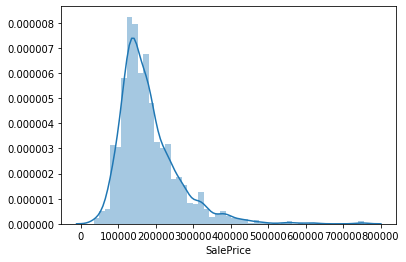

In [1468]:
# Sale price histogram
sns.distplot(y_hp)

In [1703]:
# Separate the response variable from the rest of the data
y_hp_cuant=pd.qcut(y_hp, q=10)
y_hp_cuant.value_counts()

(135500.0, 147000.0]     150
(198620.0, 230000.0]     149
(106475.0, 124000.0]     149
(179280.0, 198620.0]     146
(34899.999, 106475.0]    146
(278000.0, 755000.0]     145
(230000.0, 278000.0]     144
(163000.0, 179280.0]     144
(124000.0, 135500.0]     144
(147000.0, 163000.0]     143
Name: SalePrice, dtype: int64

### 1.1 First Data exploration

In [1470]:
#x_hp.head(10)

In [1471]:
x_hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [1653]:
# Exploration of quantitative variables
x_hp.select_dtypes(include='int64').head(1)


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65,8450,7,5,2003,196,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003,2,548,0,61,0,0,0,0,0,2,2008


In [1473]:
# Exploration of quantitative variables
x_hp.select_dtypes(include='float64').head()

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0


In [1474]:
# Exploration of categorical variables
x_hp.select_dtypes(include='object').head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


There are 36 quantitative and 43 qualitative variables in the database. After reading the data description, it is detected that MSSubClass is a categorical variable, therefore, the conversion is performed.

Many variables are related to the amount of square feet available, others to the number of rooms or bathrooms. There are many that represent the quality of some characteristics of the house and others with the year of construction. It is possible that new variables can be constructed that summarize some of them or that can be excluded to eliminate redundant information but this will be done later.

In [1475]:
# Change data type
x_hp[["MSSubClass"]]=x_hp[["MSSubClass"]].astype('object')

### 1.2 Explore and manage Missing values
Now will proceed to investigate how many **missing values** are in each variable to then decide how to proceed. "Missing data" treatment is very important to avoid biased results. Generally, missing data in training data set can reduce the power of the model which can lead to wrong prediction in classification or prediction.

In [1476]:
# Exploration of missing values
obs=x_hp.isnull().sum().sort_values(ascending=False)
percent=(x_hp.isnull().sum()/x_hp.isnull().count()).sort_values(ascending=False)
table=[obs,percent]
missing_data=pd.concat([obs,percent*100], axis=1,keys=['# Obs.', 'Percent'])
missing_data=missing_data[missing_data['Percent'] > 0]
missing_data.head(20)

,# Obs.,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


In the previous table it can be seen that there are 19 variables that present missing data. But in the data description of the categorical variables it is observed that most of the NaNs represent the non-existence of that characteristic, therefore, we proceed to replace them with 'None'. Although some, more than 80% of their data are "null", this is important information, surely the correlation of this type of variables with SalePrice is almost nil, but this is something that we will verify later.

There are several methodologies that allow us to solve the problem of lack of data. Some of them are:

* Delete those rows in with na's.
* Complete the na's by assigning the average value or the value more frequently, in these cases the correlations between the characteristics are not taken into account and bias can be introduced in the data.
* Use k nearest neighbors to predict the values based on how closely it resembles the points in the training set but it is computationally expensive.
* Imputation using Multivariate Imputation by Chained Equation that works by filling the missing data multiple times. Is very flexible and can handle different variables of different data types.
* Imputation Using Deep Learning (Datawig), this method works very well with categorical and non-numerical features. It is a library that learns Machine Learning models using Deep Neural Networks to impute missing values in a dataframe. It also supports both CPU and GPU for training.

LotFrontage, MasVnrArea, MasVnrType, Electrical and GarageYrBlt are variables to which the missing values will be estimated. In the others, the NaNs will be replaced by 'None'

It was tried to use the Multiple Imputations Chained Equation algorithm but it was't possible to install the fancyimpute library and since the percentage of missing values is not so high it is decided to use the second solution. Another solution could have been to eliminate the rows but in this case, we do not want to delete information since it is not yet known if these variables are going to be present in the model.

In [1297]:
# Imputate missing values with Multiple Imputations Chained Equation
#from fancyimpute import IterativeImputer

# Initialize IterativeImputer
#mice_imputer = IterativeImputer()

#x_hp_mice_imputed = x_hp.copy(deep=True)
#x_hp_mice_imputed.iloc[:, :] = mice_imputer.fit_transform(x_hp)

In [1477]:
# Imputate missing values by the mean and the most frequent

#variables to be impute
impute_obj=['MasVnrType','Electrical','GarageYrBlt']  
impute_int=['LotFrontage','MasVnrArea']

# imput mean in integer and most frequent in objects
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(x_hp[impute_int])
imputed_mean= imp_mean.transform(x_hp[impute_int])

imp_freq = SimpleImputer(strategy='most_frequent')
imp_freq.fit(x_hp[impute_obj])
imputed_freq= imp_freq.transform(x_hp[impute_obj])

# replace colums imputed
x_hp[impute_int]=pd.DataFrame(data=imputed_mean,columns=impute_int)
x_hp[impute_obj]=pd.DataFrame(data=imputed_freq,columns=impute_obj)

# check how many missing values are
x_hp[impute_obj].isnull().sum().max()+ x_hp[impute_int].isnull().sum().max()

0

Now we will replace the missing values with the value "None" in the corresponding variables.

In [1478]:
# replace NaN with "None"
x_hp[missing_data.index]=x_hp[missing_data.index].where(x_hp[missing_data.index].notnull(), "None")
# check nulls
x_hp.isnull().sum().max()

0

In [1479]:
# Change data type
x_hp[["MSSubClass"]]=x_hp[["MSSubClass"]].astype('object')
x_hp[["MasVnrArea","LotFrontage","GarageYrBlt"]]=x_hp[["MasVnrArea","LotFrontage","GarageYrBlt"]].astype('int64')

### 1.3 Exloratory Data Analysis

Exploratory data analysis is an important approach to analyzing data sets by summarizing their main characteristics with visualizations. The EDA process is a crucial step prior to building a model in order to understand the correlation betheen the variables and with the variable we want to predict.

It is important to verify that the same units of measurements are used in quantitative variables. In this case, no differences were found, but if they had been found in addition to the conversion, normalization can be used to eliminate the dimensions of the characteristics and, at the same time, keep all the information available in them.

Another technique that can be used with quantitative variables is discretization. In discretization it is based on a characteristic, usually quantitative, and threshold values that define the levels of an ordinal characteristic are sought. From this ordinal characteristic a set of dummies characteristics can be created, as seen above. The characteristics thus defined are suitable for models in which discrete values are used, such as rule-based models.



In [1480]:
# quantitave and ordinal variables
quantitative = [f for f in x_hp.columns if x_hp.dtypes[f] != 'object']
# categorical
categorical = [f for f in x_hp.columns if x_hp.dtypes[f] == 'object']  

The distribution of quantitative variables according to the sale price is shown below.

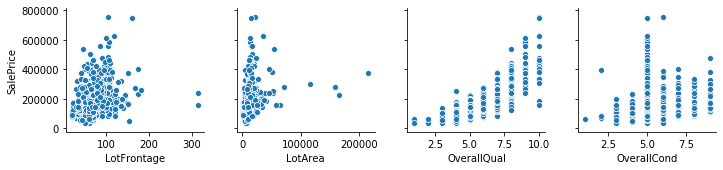

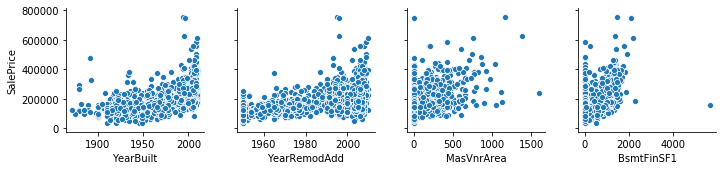

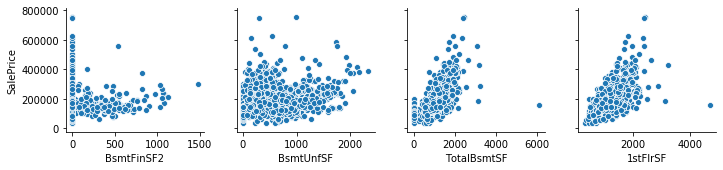

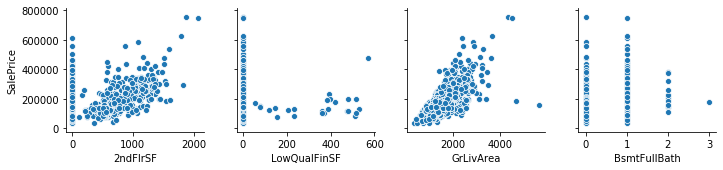

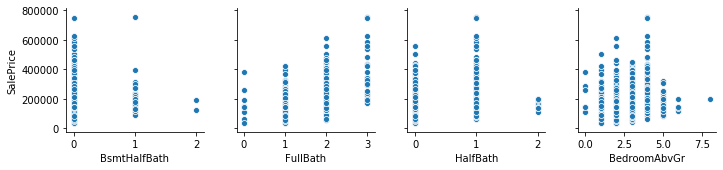

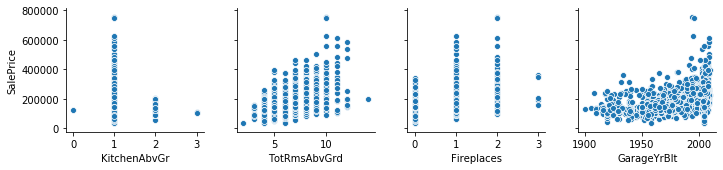

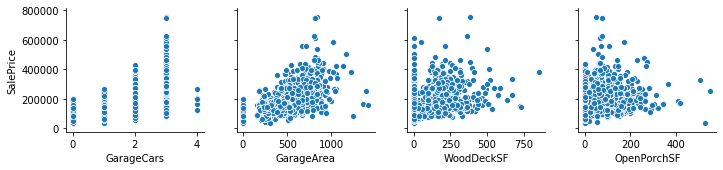

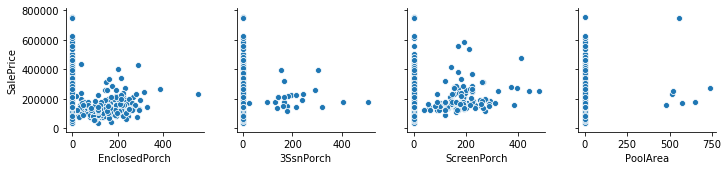

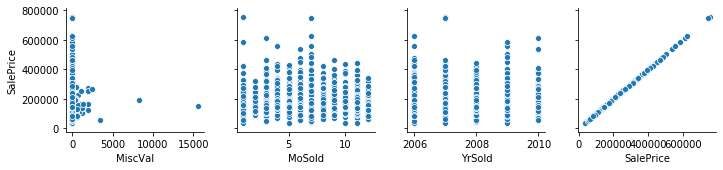

In [1302]:

quant_plot=pd.concat([x_hp[quantitative],y_hp.to_frame()], sort=False, axis=1)

for i in range(0, len(quant_plot.columns)-1, 4):
    sns.pairplot(data=quant_plot,
                x_vars=quant_plot.columns[i:i+4],
                y_vars=['SalePrice']
                )

Looking at the distribution of the variables according to the sales price, it can be seen that there are 10 variables in which most of the values take the value zero. For example in PoolArea almost all of its values are zero, probably because a large part of the houses do not have a pool. In the estimation of the model, it will be studied whether they provide information or not. The presence of some outliers is also observed.

Leaving aside these variables we can observe that, those related to areas have a positive correlation with the response variable. The larger the area, the greater the sale price. There are others such as ScreenPorch in which the correlation is not so clear. Qualitative variables such as OverallQual seem to present a positive correlation. Finally, the variables related to the number of rooms or bathrooms many of them also have a positive correlation. It is possible that many of them present mulitcolinearity but that will be studied later.

To obtain more information, it is decided to calculate the dispersion matrix and include the 20 variables with the highest correlation.

A correlation between variables indicates that as one variable changes in value, the other variable tends to change in a specific direction. Understanding that relationship is useful because we can use the value of one variable to predict the value of the other variable. Crrelation coefficient is a quantitative assessment that measures both the direction and the strength of this tendency to vary together.

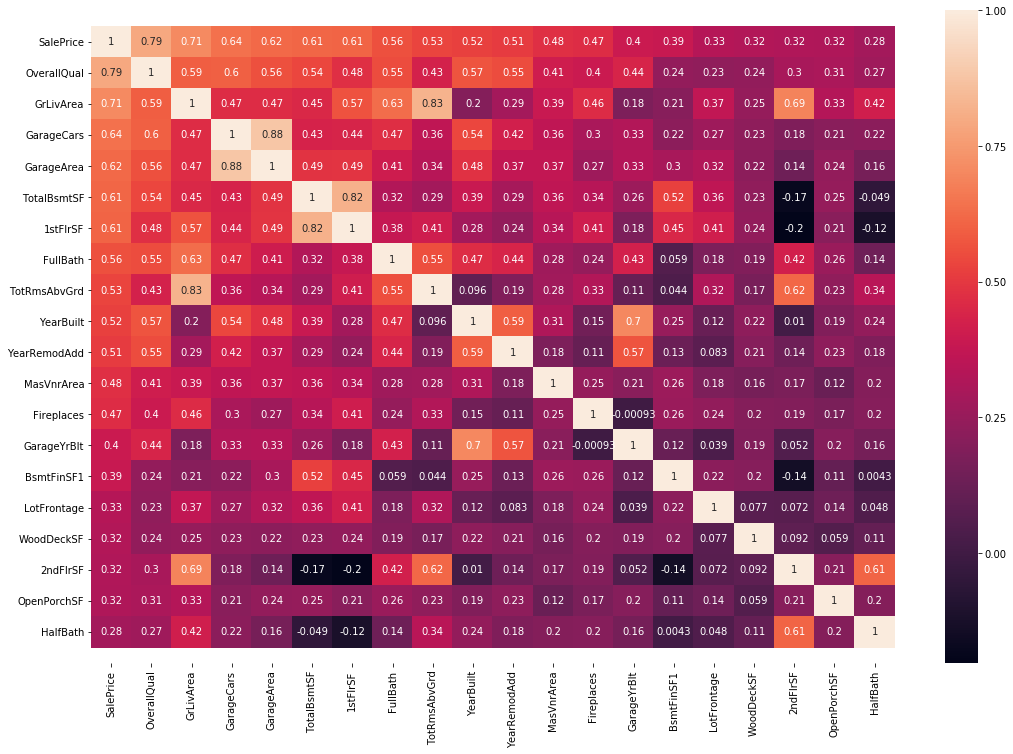

In [1303]:
# quantitave variables correlation
quantitative = [f for f in x_hp.columns if x_hp.dtypes[f] != 'object']

corWithSalePrice = quant_plot.corr().nlargest(20,'SalePrice')['SalePrice'].index
f , ax = mp.subplots(figsize = (18,12))
ax = sns.heatmap(quant_plot[corWithSalePrice].corr(), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
mp.show()

The first thing we can observe is that OverallQual is the one that has the highest correlation with the response variable, followed by GrLivArea but this in turn has a strong correlation with TotRmsAbvGrd which is to be expected since the total area depends on the total rooms. Something similar happens with other varaibles such as GarageArea and GarageCars, 1stFlrSF and TotalBsmtSF and others.

This type of matrix helps us to understand even more the available information.


Next, we will observe what happens with the categorical variables. For this, it is decided to use boxplot. A boxplot is a standardized way of displaying data distribution based on a summary of five numbers ("minimum", first quartile (Q1), median, third quartile (Q3) and "maximum"). In addition, the presence of outliers and what they are can be observed.

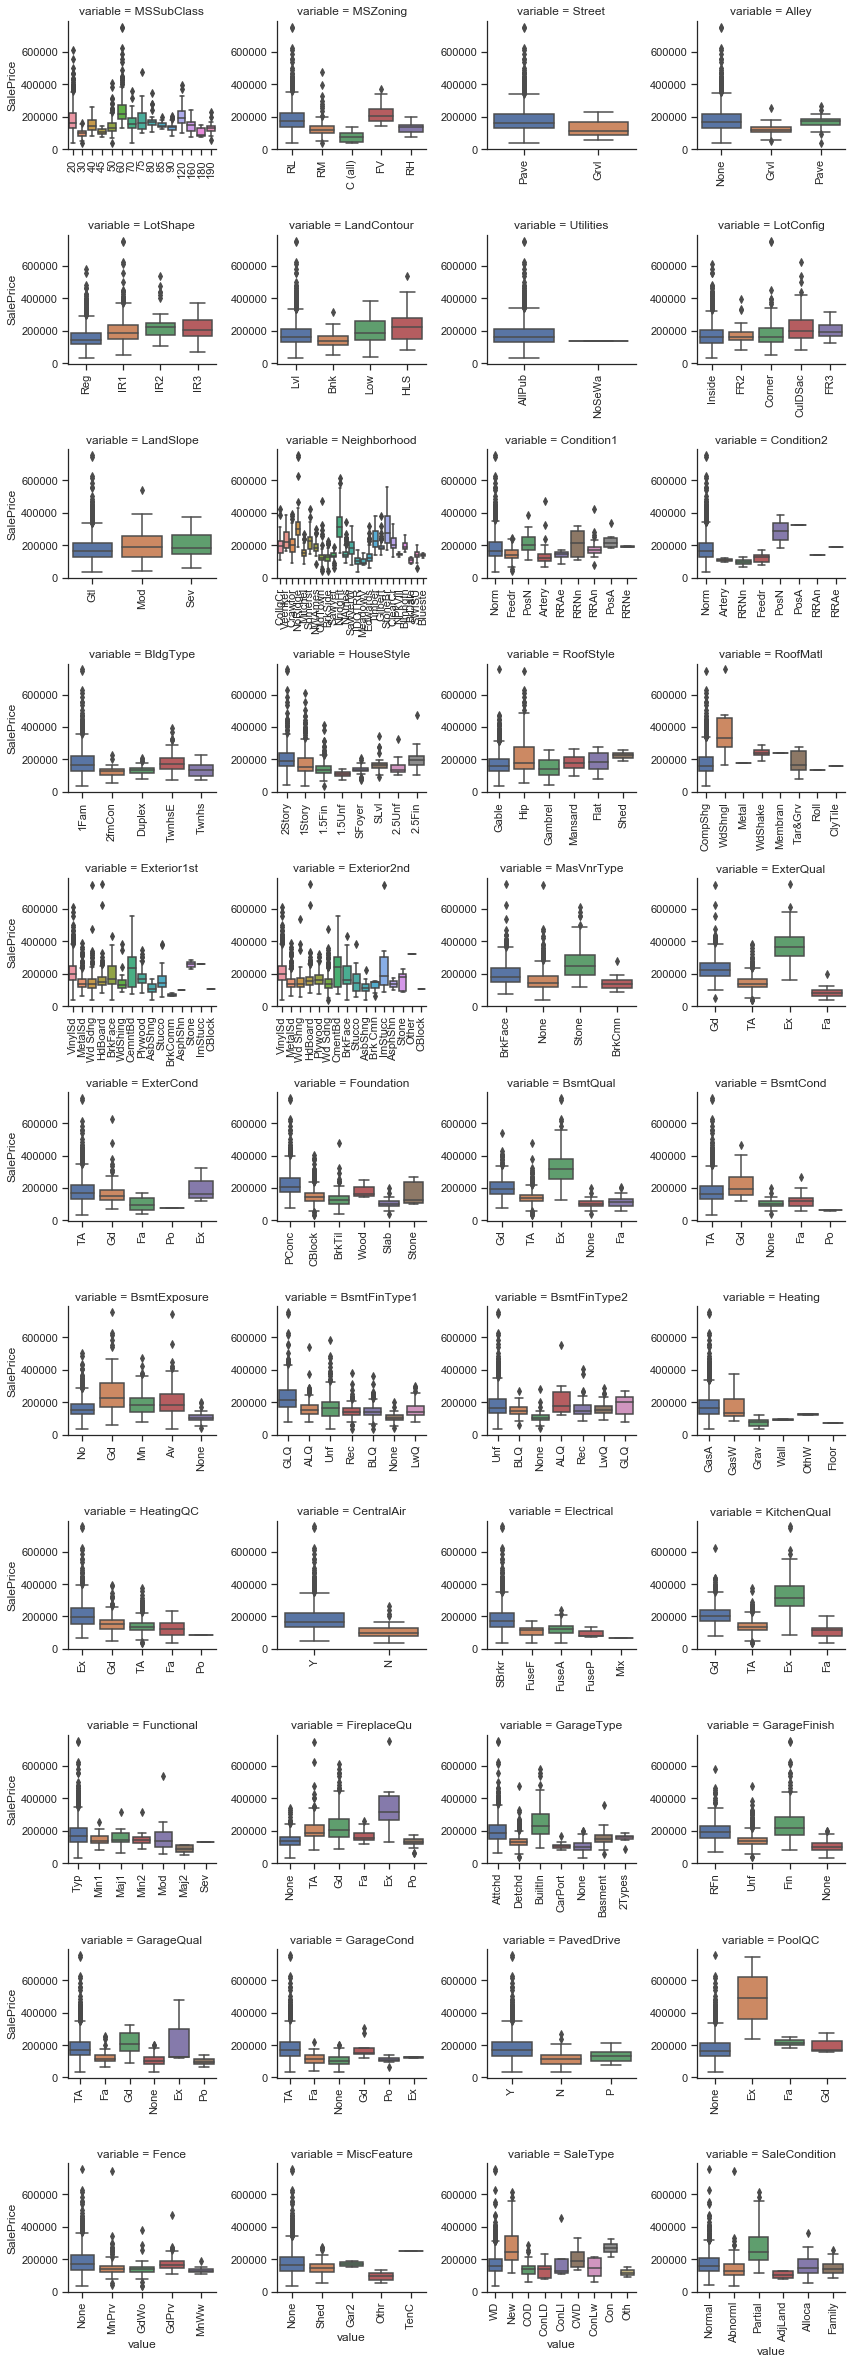

In [1487]:
# categorical variables boxplot
cat_plot=pd.concat([x_hp[categorical],y_hp.to_frame()], sort=False, axis=1)

for c in categorical:
    cat_plot[c] = cat_plot[c].astype('category')


def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=mp.xticks(rotation=90)
f = pd.melt(cat_plot, id_vars=['SalePrice'], value_vars=categorical)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(boxplot, "value", "SalePrice")
    

KitchenQual, could indicate that the quality influences in SalePrice since, for example, 50% of the houses whose kitchen is in excellent quality have higher sales prices. While, fair condition is associated with lower values.

The type of housing (BldgType) also seems to influence in price but the independent single-family type has great dispersion, something similar happens with ExterQual.

The neighborhood also seems to present a certain correlation with the response variable. And there are variables such as LotShape and LandSlope in which there seems to be no correlation. In these graphs it is observed, in addition that there are some outliers.

To corroborate these assumptions an ANOVA Test could be performed, this test allows us to contrast whether or not there is a change in the population mean according to the different categories of the variables. For example if changing the type of housing changes the average value of the house. But to do this it is necessary that our response variable has a normal distribution and complies with the homoscedasticity.

### 2. Feature Selection

Feature Selection model is essential. Before creating a model, it is not possible to know which are the most significant, the least significant nor those that are simply noise. A selection that is not very demanding can end up in a model with too many characteristics that can end up in overfit. On the other hand, excessive elimination can lead to the failure to obtain useful models.

There are several ways to make the selection of the variables. For those that are **categorical**, a very common practice is to use the Pearson’s chi-squared statistical hypothesis test. That test independence between categorical variables but to be able to perform it, the response variable must also be categorical.

In the case of categorical variables, as a first step we proceed to exclude some variables whose information is present in others or those in the box-plot that have no correlation with the sale price.

The categorical variables that are selected to include in the model are: Neighborhood, BldgType, ExterQual, HeatingQC, Electrical and KitchenQual.
In addition, one variable is created: Remodel that indicate if there was a remodelation or not. There are no changes in the price given the Remodel variable, therefore it is not included in the selection.

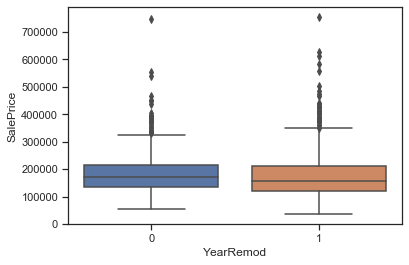

In [1488]:
x_hp['YearRemod']= x_hp.apply(lambda row: row.YearRemodAdd - row.YearBuilt, axis=1)
x_hp['YearRemod']=np.where(x_hp['YearRemod']>0,'1','0')
x_hp=x_hp.drop(columns='YearRemodAdd')

sns.boxplot(x=x_hp['YearRemod'], y=y_hp)

In [1489]:
# Categorical data selection
cat_select=[ 'Neighborhood', 'BldgType', 'ExterQual','HeatingQC',  
            'Electrical', 'KitchenQual']

x_hp_cat=x_hp[cat_select]

For **quantitative** variables there are several selection techniques, some of them are:

* Univariate selection of characteristics, this method allows to select the characteristics of a set that exceeds a given variance value. The characteristics that do not show variation can be removed from the set of data used since they cannot explain the variability of the dependent characteristic. This method is very useful but does not consider the information that can be used by a variable together with another, since it selects them independently.
* Selection of features with IV. The WoE can be used to select the categories of a characteristic, so that it maximizes the ability to discern in a classification problem. For this, categories have to be selected and designed, so that the absolute value of the WoE is maximum. This approach presents a problem: in case the number of groups is not defined, as many as values can be created, so that all have a value for the infinite WoE.
* Elimination of Multicollinearity Characteristics (VIF). On occasions when there is multicollinearity, a set of independent characteristics can be calculated as a linear combination of the rest, so duplicate information will be used in the training process. Due to this duplicity in the information, the training processes cannot find the appropriate parameters for the correct construction of the models. One solution to this problem is to use the Variance Inflation Factor (VIF), which allows quantifying the intensity of multicollinearity.
* Stepwise is a family of methods for selecting features iteratively. These techniques start from a model with a number of features and try to add the other features one by one or eliminate the ones used one by one. Once this is done, the quality of the models is checked and the best one is selected. This method is widely used in R software.
* LASSO Regression. This function indicates the error committed by the model based on the parameters and is the one that is minimized using the algorithm of the descending gradient to obtain the parameters of the model. Stress functions can be modified by regularization. Regularization involves adding a penalty to regression coefficients that are too large to reduce overfitting. The two most used methods are the Ridge and LASSO. The LASSO regression, by penalizing the parameters that require more weight, allows to select the characteristics eliminated those that need values of the larger parameters to be able to provide information to the model.


The first step we will take is to calculate the VIF to detect multicollinearity.

In [1490]:
# VIF calculation
quantitative = [f for f in x_hp.columns if x_hp.dtypes[f] != 'object']
x_hp_VIF=x_hp[quantitative].drop(columns=['GrLivArea','TotalBsmtSF'])  
                
def calculateVIF(x_hp_VIF):
    features = list(x_hp_VIF.columns)
    num_features = len(features)
    
    model = LinearRegression()
    
    result = pd.DataFrame(index = ['VIF'], columns = features)
    result = result.fillna(0)
    
    for ite in range(num_features):
        x_features = features[:]
        y_featue = features[ite]
        x_features.remove(y_featue)
        
        x = x_hp_VIF[x_features]
        y = x_hp_VIF[y_featue]
        
        model.fit(x_hp_VIF[x_features], x_hp_VIF[y_featue])
        
        result[y_featue] = 1/(1 - model.score(x_hp_VIF[x_features], x_hp_VIF[y_featue]))
    
    return result
pd.options.display.max_columns = None
calculateVIF(x_hp_VIF.copy(deep = True))

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
VIF,1.412884,1.253773,3.189538,1.323523,4.377004,1.378743,5.442939,1.561278,4.12659,6.056682,5.399602,1.132076,2.180588,1.145919,2.925422,2.166886,2.253693,1.387578,4.821236,1.572422,2.330993,5.655785,5.285728,1.216434,1.2221,1.2816,1.023271,1.109951,1.101597,1.022605,1.04833,1.047486


The previous table shows that GrLivARea, GarageCars and GarageArea have high VIF values, having previously eliminated GrLivArea and TotalBsmtSF. TotalBsmtSF and TotRmsAbvGrd also seem to present multicollinearity.

It is important at this point, in case of doing it, to eliminate one characteristic at a time, this is so because all the characteristics with high VIF may be collinear and when eliminating one of the set this relation disappears. Eliminating more than one characteristic at each step can lead to neglecting characteristics that are not redundant.

It is detected that a possible solution to the problem of multicollinearity is the creation of new variables that summarize the information of others and create the following:
- TotalSqFeet = GrLivArea + TotalBsmtSF
- TotalBath = BsmtFullBath + BsmtHalfBath + FullBath + HalfBath

After creating them, those that are related to the new variable are discarded.

In [1507]:
# select quantitative variables
quantitative = [f for f in x_hp.columns if x_hp.dtypes[f] != 'object']
x_hp_quant=x_hp[quantitative]

In [1508]:
x_hp_quant['TotalSqFeet'] = x_hp_quant.apply(lambda row: row.GrLivArea + row.TotalBsmtSF, axis=1)
x_hp_quant['TotalBath']= x_hp_quant.apply(lambda row: row.BsmtFullBath + row.BsmtHalfBath+row.FullBath + row.HalfBath, axis=1)


#1stFlrSF and 2ndFlrSF info is in GrLivArea
x_hp_quant=x_hp_quant.drop(columns=['GrLivArea','GarageYrBlt','GarageArea','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath', '1stFlrSF','2ndFlrSF','MoSold'])

x_hp_quant.head(5)

C:\Users\letos\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\letos\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,TotalSqFeet,TotalBath
0,65,8450,7,5,2003,196,706,0,150,0,3,1,8,0,2,0,61,0,0,0,0,0,2008,2566,4
1,80,9600,6,8,1976,0,978,0,284,0,3,1,6,1,2,298,0,0,0,0,0,0,2007,2524,3
2,68,11250,7,5,2001,162,486,0,434,0,3,1,6,1,2,0,42,0,0,0,0,0,2008,2706,4
3,60,9550,7,5,1915,0,216,0,540,0,3,1,7,1,3,0,35,272,0,0,0,0,2006,2473,2
4,84,14260,8,5,2000,350,655,0,490,0,4,1,9,1,3,192,84,0,0,0,0,0,2008,3343,4


After studying multicollinearity, a selection of those 10 variables that have a higher correlation with the sale price is made using the correlation matrix.

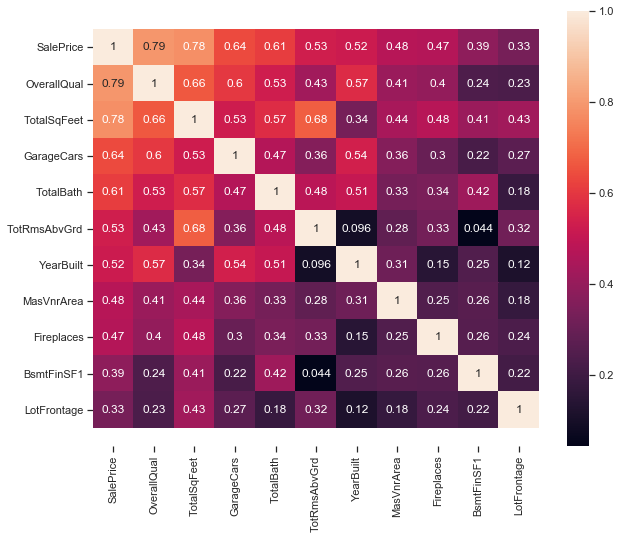

In [1560]:
# quantitave variables correlation
quant_plot=pd.concat([x_hp_quant,y_hp.to_frame()], sort=False, axis=1)


corWithSalePrice = quant_plot.corr().nlargest(11,'SalePrice')['SalePrice'].index
f , ax = mp.subplots(figsize = (10,8))
ax = sns.heatmap(quant_plot[corWithSalePrice].corr(), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
mp.show()

In [1615]:
quant_plot.head(5)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,TotalSqFeet,TotalBath,SalePrice
0,65,8450,7,5,2003,196,706,0,150,0,3,1,8,0,2,0,61,0,0,0,0,0,2008,2566,4,208500
1,80,9600,6,8,1976,0,978,0,284,0,3,1,6,1,2,298,0,0,0,0,0,0,2007,2524,3,181500
2,68,11250,7,5,2001,162,486,0,434,0,3,1,6,1,2,0,42,0,0,0,0,0,2008,2706,4,223500
3,60,9550,7,5,1915,0,216,0,540,0,3,1,7,1,3,0,35,272,0,0,0,0,2006,2473,2,140000
4,84,14260,8,5,2000,350,655,0,490,0,4,1,9,1,3,192,84,0,0,0,0,0,2008,3343,4,250000


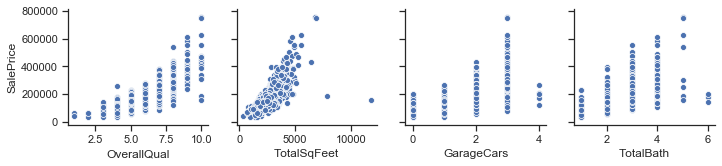

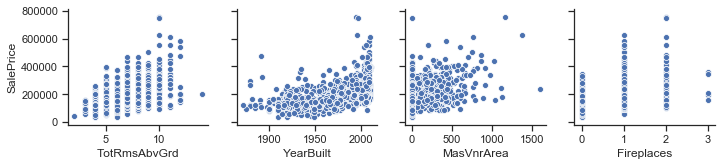

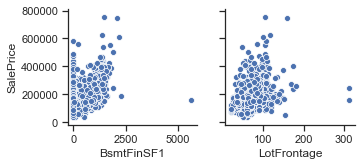

In [1562]:
quant_pair_plot=quant_plot[corWithSalePrice]
for i in range(1, len(quant_pair_plot.columns), 4):
    sns.pairplot(data=quant_pair_plot,
                x_vars=quant_pair_plot.columns[i:i+4],
                y_vars=['SalePrice']
                )

### 3. Multiple Lineal Regresion model 

In regression models, it is sought to relate the value that a variable takes (which is called a dependent variable) depending on the value of one or more variables whose values are known (called independent variables). The relationship between the dependent and the independent variable is determined by the parameters of the model. Generally, the values taken by the dependent variable are only known in a set of training data that is used to estimate the parameters.

Multiple linear regression requires the relationship between the independent and dependent variables to be linear. The linearity assumption can best be tested with scatterplots. Requires that the errors between observed and predicted values (the residuals of the regression) should be normally distributed. This assumption may be checked by looking at a histogram or a Q-Q-Plot. Normality can also be checked with a goodness of fit test (the Kolmogorov-Smirnov test), though this test must be conducted on the residuals themselves.

Mathematically a linear regression model can be described by the following equation:

\begin{equation}
y(x_1,x_2,...,x_n) = \beta_0 + \sum_{i=1}^n \beta_i x_i
\end{equation}

* *Last square estimation model*
The training process consists of looking for the parameters that reduce the total error committed by the model in the training data set. For this it is necessary to define a function that measures the error, which is usually called an effort function. In the case of linear regressions, one of the most commonly used stress functions is the quadratic error.

\begin{equation}
MSE = \ frac {1} {n} \ sum_ {i = 1} ^ n (y_i-y (x_i)) ^ 2
\end{equation}

Parameters that minimize the stress function are usually obtained using the descending gradient method. This method uses the gradient of the stress function in the parameter space to modify the values of a set of initial parameters, which may be random or have been obtained by some procedure, iteratively until values that minimize The effort function.

* *Regression Evaluation*
Once a model is obtained, it is necessary to know its quality when predicting results, for which there are different estimators. One, which is derived from the stress function used in the previous unit, is the mean square error (MSE, Mean Squared Error) and is defined as the average value of the difference between the independent variable and the squared prediction. This estimator measures errors squared, penalizing the points at which the discrepancy between the independent variable and the prediction is greater.
One of the most used estimators is the coefficient of determination or R2. This coefficient is a statistic that is defined as 1 minus the quotient between the variance of the residuals, broken by the variance of the dependent variable.

\begin{equation}
R^2= 1-\frac{\sum_{i=1}^n (y_i - y(x_i))^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
\end{equation}

R2 can be interpreted as the percentage of the total variability of the dependent variable with respect to the mean that can be explained with the model. Ideally, its value should be 1, which would indicate that the model perfectly reproduces the data from the training set. In the case of a constant model, which reproduces the average of the dependent variable, the value of R2 will be 0.


It is decided to make the adjustment of the multiple regression models only with the quantitative variables since when including the categorical ones the model does not converge.

In [1729]:
x_hp_model=pd.concat([quant_pair_plot.drop(columns='SalePrice'),x_hp_cat], axis=1)
x_hp_model.shape

(1460, 16)

LASSO regression is used to estimate the model, this method performs both the selection of the variables and the regularization to improve the prediction and the interpretability of the model. It was originally developed for last square models but then extended including generalized linear models. Regularization consists in adding a penalty to regression coefficients that are too large to reduce overfitting.

For the selection of the parameters with which the learning algorithms are executed, in this case, the value of the LASSO regression alpha will use the GridSearchCV constructor. This algorithm uses cross validation, a technique to detect the existence of overfitting in the models. Its use in the selection of models guarantees that the results are more stable.

In [1730]:
# quantitave and ordinal variables
quantitative = [f for f in x_hp_model.columns if x_hp_model.dtypes[f] != 'object']
# categorica
categorical = [f for f in x_hp_model.columns if x_hp_model.dtypes[f] == 'object']

# Creación de variables dummies
#x_hp_dummies=pd.concat([x_hp_model[quantitative].drop(columns='TotalSqFeet'),pd.get_dummies(x_hp_model[categorical].drop(columns='Neighborhood'))], axis=1)
x_hp_dummies=x_hp_model[quantitative]


# separación de los datos en entrenamiento y test
x_train,x_test,y_train,y_test=train_test_split(x_hp_dummies,y_hp)

# Creación del modelo
from sklearn.linear_model import Lasso
from scipy.stats import uniform as sp_rand
from sklearn.model_selection import RandomizedSearchCV

model = Lasso()


param_grid = dict(alpha = sp_rand())

rsearch = RandomizedSearchCV(estimator = model,
                             param_distributions = param_grid,
                             n_iter = 5000,
                             cv = 10,
                             random_state = 1)
rsearch.fit(x_train, y_train)

# Los mejores parametros para el modelo
print('El mejor parametro es', rsearch.best_params_)
print('El mejor score es', rsearch.best_score_)

El mejor parametro es {'alpha': 9.695068767479054e-05}
El mejor score es 0.729247889364146


C:\Users\letos\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [1731]:

model_lasso = Lasso(alpha = 9.695068767479054e-05)
model_lasso.fit(x_test, y_test)

#Evaluación R2
print('Lasso Regression: R^2 score on training set', model_lasso.score(x_train, y_train)*100)
print('Lasso Regression: R^2 score on test set', model_lasso.score(x_test, y_test)*100)

df = pd.DataFrame(list(model_lasso.coef_), index =x_test.columns, 
                                              columns =['Coeficientes']) 
print(df)

Lasso Regression: R^2 score on training set 75.85886087339539
Lasso Regression: R^2 score on test set 82.07702304554932
              Coeficientes
OverallQual   14032.721509
TotalSqFeet      38.516985
GarageCars    11074.212698
TotalBath      2402.951738
TotRmsAbvGrd   3897.253836
YearBuilt       271.247158
MasVnrArea       32.360048
Fireplaces     6988.268522
BsmtFinSF1       14.344569
LotFrontage     102.148212


The mean square errors of trian is almost 70 and 87  in test, is a good value of R2.

R2 is the percentage of variation of the response variable that explains the relationship with one or more predictor variables. In general, the higher the R2, the better the fit of the model to your data. R2 is always between 0 and 100%. The R-square is also known as the coefficient of determination or multiple determination (in multiple linear regression). In some cases a very high R2 may imply an overfitting of the model.

For the prediction of the results, the estimated coefficients shown in the previous table are used. For example, to estimate the price of a house we should enter the following information:
* OverallQual: Rates the overall material and finish of the house	
	10: Very Excellent, 9: Excellent, 8: Very Good, 7: Good, 6: Above Average, 5: Average, 4: Below Average, 3:	Fair, 2: Poor and 1: Very Poor 
* TotalSqFeet: toal area in sauqre feet 
Total square feet of basement area + Above grade (ground) living area square feet
* GarageCars: Size of garage in car capacity 
* TotalBath: total bathrooms 
BsmtFullBath + BsmtHalfBath + FullBath + HalfBath
* TotRmsAbvGrd: Total rooms above grade (does not include bathr 
* YearBuilt: Original construction date
* MasVnrArea: Masonry veneer area in square feet
* Fireplaces: Number of fireplaces
* BsmtFinSF1: Type 1 finished square feet (the basement finished area)
* LotFrontage : Linear feet of street connected to property


Below you can see some results of the estimate model.

In [1755]:
y_pred = model_lasso.predict(x_test)
df=pd.DataFrame({'Real':y_test[0:9], 'Predicted':y_pred[0:9]})
df

,Real,Predicted
406,115000,144572.265731
75,91000,80349.627798
1273,177000,164198.671270
1389,131000,143804.743019
1081,133000,129047.267352
552,255500,266677.037114
697,123500,118760.432882
1393,163000,149543.876204
223,97000,101183.488067


To complement the work it is decided to apply a Decision Tree Regressor using the same variables of the previous model

#### 3.1 Decision Tree Regression

In [1724]:
x_hp_dummies=x_hp_model[quantitative]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_hp_dummies, y_hp, test_size=0.20)


from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
df=pd.DataFrame({'Actual':y_test[0:10], 'Predicted':y_pred[0:10]})
df

,Actual,Predicted
752,217000,168500.0
494,91300,108000.0
135,174000,236000.0
1148,116900,89500.0
1131,93500,99500.0
316,260000,225000.0
680,143000,130500.0
52,110000,115000.0
24,154000,138800.0
650,205950,194500.0


In [1725]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 29570.195205479453
Mean Squared Error: 3108858590.6541095
Root Mean Squared Error: 55757.139369358876


The mean absolute error for our algorithm is 28460, which is less than 1% of the mean of all the values in the data. This means that our algorithm did a fine prediction job. Some exapmles where show to see how the algoritm do the prediction.

In [ ]:
#tree.plot_tree(regressor.fit(x_train, y_train))